In [138]:
import pandas as pd
import numpy as np
df = pd.read_csv("data//healthcare-dataset-stroke-data.csv")

##max age of 82, max bin get be set accordingly 
print("The max value in age is : " + str(df['age'].max()))
print("Total number of nulls in age is: " + str(df['age'].isnull().sum())) ##check for null
print("Total number of NAs in age is : " + str(df['age'].isna().sum())) ##check for NAs

##define labels and bins using equal width binning
bins = [0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
#replace all age values with their corresponding bin
df['age'] = pd.cut(df['age'], bins=bins,labels=labels)


##print the counts for each bin
age_bins = df.groupby('age')['age'].count().reset_index(name='Count').to_dict(orient='records') ##gets count by bin
print("\nThe sum of people in each age bin is: \n" + str(age_bins))

##get percentage per bin
for d in age_bins:
    for k,v in d.items():
        if(type(v) == int):
            percent = round(v/len(df) * 100,2)
            print("Percentage in bin: " +  str(percent) + "%")
            
##loop to find the number of unknown smoking entries
unknown_count = 0
##store the indexes of the unknown smoking status entries in case it's needed later
unknown_indexes = []
for index, i in enumerate(df['smoking_status']):
    if(i.lower() == 'unknown'):
        #get index and value 
        #print(index, i)
        unknown_indexes.append(index)
        unknown_count+=1
##get percentage of unknown
unknown_percent = unknown_count/len(df) * 100
unknown_percent = round(unknown_percent,4)
print("\nThe percent of entries with an unknown smoking status is: " + str(unknown_percent) + "% or " +str(unknown_count) + " entries")

The max value in age is : 82.0
Total number of nulls in age is: 0
Total number of NAs in age is : 0

The sum of people in each age bin is: 
[{'age': '0-10', 'Count': 507}, {'age': '10-20', 'Count': 518}, {'age': '20-30', 'Count': 545}, {'age': '30-40', 'Count': 674}, {'age': '40-50', 'Count': 739}, {'age': '50-60', 'Count': 823}, {'age': '60-70', 'Count': 594}, {'age': '70-80', 'Count': 594}, {'age': '80-90', 'Count': 116}]
Percentage in bin: 9.92%
Percentage in bin: 10.14%
Percentage in bin: 10.67%
Percentage in bin: 13.19%
Percentage in bin: 14.46%
Percentage in bin: 16.11%
Percentage in bin: 11.62%
Percentage in bin: 11.62%
Percentage in bin: 2.27%

The percent of entries with an unknown smoking status is: 30.2153% or 1544 entries


In [139]:
##check for any non-binary values in heart_disease
non_bin_heart_count = 0
for val in df['heart_disease']:
    if(val != 1 and val != 0):
        print(val)
if(non_bin_heart_count == 0):
    print("No non-binary values found in heart_disease")

No non-binary values found in heart_disease


In [140]:
##check for any non-binary values in hypertension
non_bin_hypt_count = 0
for val in df['hypertension']:
    if(val != 1 and val != 0):
        print(val)
if(non_bin_hypt_count == 0):
    print("No non-binary values found in hypertension")

No non-binary values found in hypertension


In [141]:
##converts ever_married to 0/1 if not already done 
if(isinstance(df['ever_married'][0],str)):
    df['ever_married'] = df['ever_married'].str.lower().map({'yes': 1, 'no': 0})

##checks for non-binary values in ever_married
non_bin_married_count = 0
for val in df['ever_married']:
    if(val != 1 and val != 0):
        print(val)
if(non_bin_married_count == 0):
    print("No non-binary values found in ever_married")

No non-binary values found in ever_married


In [142]:
##check for any non-binary values in stroke
non_bin_stroke_count = 0
for val in df['stroke']:
    if(val != 1 and val != 0):
        print(val)
if(non_bin_stroke_count == 0):
    print("No non-binary values found in stroke")

No non-binary values found in stroke


In [39]:
##implementation of equal size binning for age using 
##number of bins can be adjusted, 8 seemed to give the most even distribution without having too many bins
num_bins = 8
df = pd.read_csv("data//healthcare-dataset-stroke-data.csv")

df['age'] = pd.qcut(df['age'], q = num_bins)
print("total entires in each bin is : ", df['age'].value_counts())
print("\npercentage in each bin is: ", df['age'].value_counts()/len(df)*100)

total entires in each bin is :  (36.0, 45.0]     667
(25.0, 36.0]     658
(13.0, 25.0]     648
(0.079, 13.0]    645
(53.0, 61.0]     638
(45.0, 53.0]     626
(61.0, 72.0]     624
(72.0, 82.0]     604
Name: age, dtype: int64

percentage in each bin is:  (36.0, 45.0]     13.052838
(25.0, 36.0]     12.876712
(13.0, 25.0]     12.681018
(0.079, 13.0]    12.622309
(53.0, 61.0]     12.485323
(45.0, 53.0]     12.250489
(61.0, 72.0]     12.211350
(72.0, 82.0]     11.819961
Name: age, dtype: float64


<AxesSubplot:xlabel='bmi'>

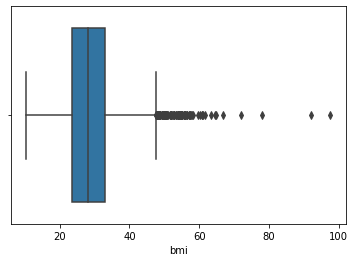

In [143]:
#visulisation of outliers in bmi
import seaborn as sns
sns.boxplot(x=df['bmi'])


<AxesSubplot:xlabel='avg_glucose_level'>

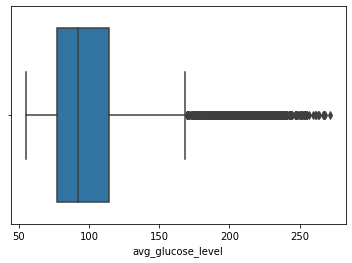

In [144]:
#visulisation of outliers in average glucose
sns.boxplot(x=df['avg_glucose_level'])

In [220]:
from scipy import stats
##adds in z-score column to df for bmi and glucose level
cols = ['bmi','avg_glucose_level']
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    
print("Indexes where z-score is greater than 3 for bmi below:\n")
print(np.where((df['bmi_zscore']) >=3))

print("\n\nIndexes where z-score is greater than 3 for glucose below:\n")
print(np.where((df['avg_glucose_level_zscore']) >=3))

Indexes where z-score is greater than 3 for bmi below:

(array([ 113,  258,  270,  333,  358,  430,  466,  544,  637,  662,  672,
        715,  761,  928, 1061, 1077, 1304, 1322, 1532, 1559, 1564, 1584,
       1595, 1660, 1898, 2071, 2081, 2128, 2136, 2330, 2441, 2545, 2555,
       2567, 2764, 2815, 2840, 3060, 3243, 3508, 3588, 3606, 3688, 3702,
       3825, 3909, 3931, 3980, 4154, 4188, 4209, 4225, 4351, 4407, 4475,
       4838, 4906, 4952], dtype=int64),)


Indexes where z-score is greater than 3 for glucose below:

(array([  33,   45,  122,  123,  135,  193,  196,  220,  243,  256,  303,
        330,  386,  552,  755,  785, 1067, 1070, 1113, 1207, 1384, 1436,
       1453, 1529, 1626, 2182, 2203, 2293, 2462, 2494, 2633, 2693, 2751,
       3088, 3215, 3342, 3393, 4048, 4249, 4283, 4356, 4447, 4457, 4470,
       4598, 4711, 4909, 4983, 5034], dtype=int64),)


In [235]:
##checking for outliers in bmi using iqr
q1_bmi = df['bmi'].quantile(0.25)
q3_bmi = df['bmi'].quantile(0.75)
iqr_bmi = q3_bmi-q1_bmi
outliers_bmi = (df['bmi'] < (q1_bmi - 1.5 * iqr_bmi)) |(df['bmi'] > (q3_bmi + 1.5 * iqr_bmi))

outliers_bmi_count = 0
for i in outliers_bmi:
    if(i != False):
        outliers_bmi_count += 1
print("number of outliers found with iqr for bmi is : ",outliers_bmi_count)
print("\nIndexes where outliers were detected: ")
print(np.where(outliers_bmi != False))



number of outliers found with iqr for bmi is :  110

Indexes where outliers were detected: 
(array([  21,  113,  254,  258,  270,  333,  341,  358,  430,  462,  466,
        493,  539,  544,  595,  622,  637,  662,  672,  715,  761,  805,
        860,  928, 1003, 1061, 1077, 1239, 1257, 1267, 1304, 1322, 1501,
       1532, 1559, 1564, 1575, 1584, 1595, 1641, 1660, 1782, 1898, 1988,
       2016, 2067, 2071, 2081, 2128, 2136, 2232, 2277, 2284, 2290, 2309,
       2330, 2411, 2441, 2545, 2555, 2567, 2585, 2723, 2764, 2815, 2840,
       2883, 2896, 3024, 3060, 3218, 3238, 3243, 3305, 3333, 3439, 3508,
       3541, 3588, 3606, 3688, 3702, 3825, 3867, 3909, 3931, 3959, 3980,
       4071, 4126, 4154, 4188, 4209, 4223, 4225, 4351, 4405, 4407, 4456,
       4475, 4650, 4704, 4779, 4838, 4847, 4858, 4906, 4952, 5009, 5057],
      dtype=int64),)


In [236]:
##checking for outliers in bmi using iqr
q1_glu = df['avg_glucose_level'].quantile(0.25)
q3_glu = df['avg_glucose_level'].quantile(0.75)
iqr_glu = q3_glu-q1_glu
outliers_glu = (df['avg_glucose_level'] < (q1_glu - 1.5 * iqr_glu)) |(df['avg_glucose_level'] > (q3_glu + 1.5 * iqr_glu))
outliers_glu_count = 0
for i in outliers_glu:
    if(i != False):
        outliers_glu_count += 1
print("number of outliers found with iqr for glucose is : ",outliers_glu_count)
print("\nIndexes where outliers were detected: ")
print(np.where(outliers_glu != False))

number of outliers found with iqr for glucose is :  627

Indexes where outliers were detected: 
(array([   0,    1,    3,    4,    5,   13,   14,   16,   17,   19,   20,
         21,   22,   23,   27,   28,   29,   30,   32,   33,   36,   44,
         45,   54,   55,   57,   58,   59,   60,   66,   71,   73,   76,
         90,   95,   97,  101,  102,  107,  113,  115,  122,  123,  124,
        128,  130,  132,  134,  135,  137,  138,  139,  144,  149,  150,
        151,  155,  157,  158,  163,  175,  179,  187,  189,  190,  193,
        195,  196,  201,  212,  215,  217,  218,  219,  220,  222,  225,
        226,  233,  234,  235,  241,  242,  243,  254,  256,  258,  272,
        277,  278,  293,  298,  303,  307,  314,  318,  325,  326,  330,
        331,  332,  337,  343,  350,  355,  360,  365,  386,  396,  399,
        411,  417,  426,  429,  433,  436,  444,  456,  466,  467,  468,
        477,  479,  492,  515,  544,  549,  551,  552,  559,  563,  570,
        576,  581,  583,  5

In [237]:
df.describe()

,id,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,bmi_zscore,avg_glucose_level_zscore
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,4.909000e+03,5.110000e+03
mean,36517.829354,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728,-1.326602e-15,3.603293e-15
std,21161.721625,0.296607,0.226063,0.475034,45.283560,7.854067,0.215320,1.000102e+00,1.000098e+00
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,-2.367580e+00,-1.126958e+00
25%,17741.250000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000,-6.867508e-01,-6.383223e-01
50%,36932.000000,0.000000,0.000000,1.000000,91.885000,28.100000,0.000000,-1.010073e-01,-3.149945e-01
75%,54682.000000,0.000000,0.000000,1.000000,114.090000,33.100000,0.000000,5.356705e-01,1.754080e-01
max,72940.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,8.748813e+00,3.657145e+00
